In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

In [19]:
ENTRENO = 'Entreno'
DESCANSO = 'Descanso'

def read_file(path):
  file = open(path, mode = 'r', encoding = 'utf-8-sig')
  leido = file.read().splitlines()

  cant_dias = leido[0]

  e_i=[]
  s_i=[]

  rango_cant_dias = range(int(cant_dias))
  for dia in rango_cant_dias:
    e_i.append(int(leido[dia+ 1]))
    s_i.append(int(leido[int(cant_dias)+dia+1]))

  file.close()

  return e_i, s_i, cant_dias


def scaloni_ganancia(e_i, s_i):
  cant_dias = len(e_i)
  matriz = np.zeros((cant_dias, cant_dias), dtype=int)

  for columna in range(len(matriz[0])):
    for fila in range(len(matriz)):
      if fila == 0:
        if columna==0 or columna==1:
          matriz[fila][columna] = min(s_i[fila], e_i[columna])
        else:
          matriz[fila][columna] = min(s_i[fila], e_i[columna]) + max(matriz[:, columna-2])
      elif fila > columna: continue
      else:
          matriz[fila][columna] = min(s_i[fila], e_i[columna]) + matriz[fila-1, columna-1]
  return matriz

def scaloni_get_max_ganancia(opt):
  return max(opt[:, -1])


def scaloni_plan(opt):
  cant_dias = opt.shape[1]
  idx_fila, idx_col = (np.argmax(opt[:, -1]), cant_dias - 1)
  plan = [ENTRENO]

  while len(plan) != cant_dias:
    if idx_fila != 0:
      idx_fila -= 1
      idx_col -= 1
      plan.append(ENTRENO)
    else:
      idx_fila = np.argmax(opt[:, idx_col-1]) # check if idx_col == 0
      idx_col -= 1
      plan.append(DESCANSO)

  return plan[::-1]

## Generación de sets

In [31]:
rng = np.random.default_rng(seed=42)
def generate_random(n, lower_limit=1, upper_limit=100):
  e_i = rng.integers(lower_limit, upper_limit, size=n)
  s_i = rng.integers(lower_limit, upper_limit, size=n)
  s_i = np.sort(s_i)[::-1]
  return e_i, s_i

In [32]:
generate_random(10)

(array([ 9, 77, 65, 44, 43, 86,  9, 70, 20, 10]),
 array([97, 84, 78, 76, 73, 72, 53, 51, 45, 13]))

## Pruebas de tiempos

In [33]:
import time

In [34]:
def timeit_scaloni(e_i, s_i):
  start_time = time.time()
  ganancia = scaloni_ganancia(e_i, s_i)
  scaloni_plan(ganancia)
  end_time = time.time()
  return end_time - start_time

In [35]:
data_n = []
data_time = []

inicio_rango = 10
fin_rango = 15000
incremento = 1000

for n in range(inicio_rango, fin_rango + 1, incremento):
    # Genera tus datos o carga datos de alguna fuente
    ei, si = generate_random(n)  # Ajusta esto según tu caso

    timeit = timeit_scaloni(ei, si)

    data_n.append(n)
    data_time.append(timeit*1000)

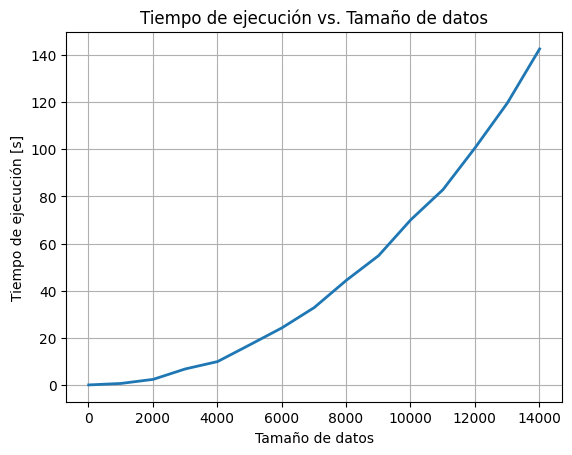

In [36]:
import math
window_size = 500

x = data_n
y = [x / 1000 for x in data_time]

#y_suavizado = np.convolve(y, np.ones(window_size)/window_size, mode='same')

plt.plot(x, y, label='Mediciones sin suavizar', linewidth=2)
#plt.plot(x, y_suavizado, label='Mediciones suavizadas', linewidth=2)
#plt.plot(x, [n*n/1000 for n in x], label='n2', linewidth=3)
plt.title('Tiempo de ejecución vs. Tamaño de datos')
plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo de ejecución [s]')
plt.grid(True)
#plt.legend()
plt.show()